In [4]:
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt


from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


## Quantum Part
from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt

#function set
%run Function_Set.ipynb

In [108]:
def make_dictionary():
    Var_dictionary = {}
    # set-up a dictionary
    Total = 0
    # x input
    for e in range(2):
        Var_dictionary["x_%d"%(e)] = int(e)
    Total = len(Var_dictionary)   
    return Var_dictionary, Total

In [109]:
def show_graph(matrix):
    matfig = plt.figure(figsize=(9,9)) 
    plt.matshow(matrix,fignum=matfig.number)
    plt.colorbar()
    plt.show() 

In [110]:
def dot(*mats):
    A = mats[0]
    for B in mats[1:]:
        A = np.dot(A,B)    
    return A
        

In [111]:
def add_front(a,b):
    if len(a) < len(b):
        c = b.copy()
        c[:len(a)] += a
    else:
        c = a.copy()
        
        c[:len(b)] += b  
    return c

In [112]:
def add_end(a,b):
    if len(a) < len(b):
        c = b.copy()
        c[-len(a):] += a
    else:
        c = a.copy()
        
        c[-len(b):] += b  
    return c

In [113]:
a = np.array([1,2,3,5])
b = np.array([2,1])
print(add_front(a,b))
print(add_end(a,b))

[3 3 3 5]
[1 2 5 6]


## Objective
$$
\max 8y_{1} + 9y_{1} + 5y_{3} + 6y_{4} -15x_{1} - 10x_{2} 
$$

$$
s.t. \quad y_{1} + y_{3} \leq 1
$$

$$
\qquad \  y_{1} + y_{4} \leq 1
$$

$$
\qquad \  y_{2} + y_{3} \leq 1
$$

$$
\qquad \  y_{2} + y_{4} \leq 1
$$

$$
\qquad \  x_{1} + x_{2} \geq 1
$$

$$
\qquad \  y_{1} - x_{1} \leq 0
$$

$$
\qquad \  y_{2} - x_{1} \leq 0
$$

$$
\qquad \  y_{3} - x_{2} \leq 0
$$

$$
\qquad \  y_{4} - x_{2} \leq 0
$$

$$
\qquad \ \forall \ j \quad y_{j} \geq 0
$$

## The Master problem

$$
\max_{x,t} \, c^{\intercal} x + t
$$

$$
s.t. \quad (b-Ax)^{\intercal}u^{k} \geq t \quad \forall k \in K
$$

$$
\qquad \ (b-Ax)^{\intercal}r^{j} \geq 0 \quad \forall j \in J
$$

$$
t \in \mathbb{R} \ , \  x\in X
$$


## The Rewritten Master problem

$$
\max_{x,t} \, c^{\intercal} x + t
$$

$$
s.t. \quad t +\left(u^{k}\right)^{\intercal}Ax \geq b^{\intercal}u^{k} \quad \forall k \in K
$$

$$
\qquad \ \left(r^{j}\right)^{\intercal}Ax \geq b^{\intercal}r^{j} \quad \forall j \in J
$$

$$
t \in \mathbb{R} \ , \  x\in X
$$

## Initial relaxed Master Problem
The first four constraints imply $y_{j} \leq 1$ for $j = 1, . . . , 4$, for any choice of $x$.
Thus, we can get a very simple bound for the problem: set $y_{j} = 1$ for $j = 1, . . . , 4$. This gives a value of $28$ from the $y$ variables.



In [114]:
A = np.array([[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [-1, -1],
              [-1, 0],
              [-1, 0],
              [0, -1],
              [0, -1],])

G = np.array([[1,0,1,0], 
              [1,0,0,1],
              [0,1,1,0],
              [0,1,0,1],
              [0,0,0,0],
              [1,0,0,0],
              [0,1,0,0],
              [0,0,1,0],
              [0,0,0,1],
             ])
b = np.array([1,1,1,1,-1,0,0,0,0])

c = np.array([-15.0,-10.0])

h = np.array([8,9,5,6])

In [115]:
#obj

QUBO_matrix_initial = np.zeros((2,2))
Var_dic, length = make_dictionary()

# OBJ
QUBO = np.diag(np.abs(c))  

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)


In [116]:
OP = sampleset.to_pandas_dataframe()
OP_final = OP.to_numpy()[0]
result = OP_final[:length]
print("QUBO Q = :")
print( QUBO )
print("result x = :",result)

QUBO Q = :
[[15.  0.]
 [ 0. 10.]]
result x = : [0. 0.]


In [117]:
x = result
obj = b-np.dot(A,x)

print("obj:",obj)

obj: [ 1.  1.  1.  1. -1.  0.  0.  0.  0.]


In [118]:
from scipy.optimize import linprog

In [119]:
#obj = [+1, +1, 1, 1, -1, 0, 0, 0, 0]
#      ─┬  ─┬  
#       │   │  .......
#       │   └┤ Coefficient for u2
#       └────┤ Coefficient for u1

lhs_ineq = [[-1, -1, -0, -0, -0, -1, -0, -0, -0],
            [-0, -0, -1, -1, -0, -0, -1, -0, -0],
            [-1, -0, -1, -0, -0, -0, -0, -1, -0],
            [-0, -1, -0, -1, -0, -0, -0, -0, -1]]

rhs_ineq = [-8,
            -9,
            -5,
            -6]

bnd = [(0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),   
       (0, float("inf")),]  # Bounds of u s

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")

In [120]:
r = np.sign(opt['x'])
print(r)

[0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [121]:
cons_add_lhs = dot(r,A)
cons_add_rhs = dot(b,r)
print(cons_add_lhs,"<=",cons_add_rhs)

[-1. -1.] <= -1.0


In [122]:
symbol = "<="
if np.sign(cons_add_rhs) == -1:
    symbol = ">="

cons_add_lhs_final = np.sign(cons_add_rhs) * cons_add_lhs
cons_add_rhs_final = np.sign(cons_add_rhs) * cons_add_rhs


print(cons_add_lhs_final, symbol, cons_add_rhs_final)

[1. 1.] >= 1.0


In [123]:
np.asarray(0.5 * (np.outer(cons_add_lhs_final,cons_add_lhs_final) - 3.0 * np.diag(cons_add_lhs_final)))

array([[-1. ,  0.5],
       [ 0.5, -1. ]])

[[-135.   75.]
 [  75. -140.]]


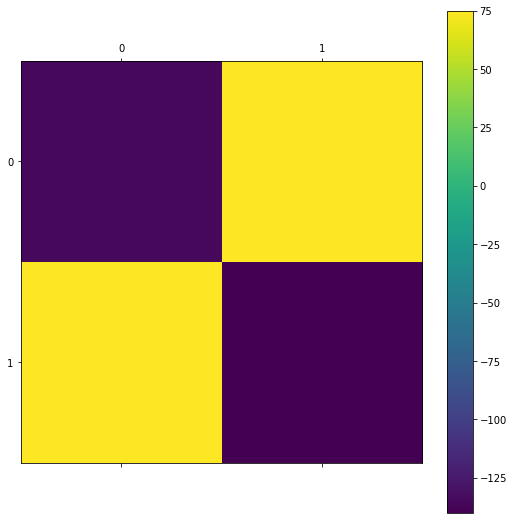

In [124]:
# Obj
QUBO = np.diag(np.abs(c))  

# add constraint (r1)^{T} Ax ≤ b^{T} r1 to (RMP):

Penalty = np.max(np.abs(c))*10

QUBO += Penalty * np.asarray(0.5 * (np.outer(cons_add_lhs_final,cons_add_lhs_final) - 3.0 * np.diag(cons_add_lhs_final)))

print(QUBO)
show_graph(QUBO)

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)

In [125]:
OP = sampleset.to_pandas_dataframe()
OP_final = OP.to_numpy()[0]
result = OP_final[:length]
print("result x = :",result)

result x = : [0. 1.]


In [126]:
x = result
obj = b-np.dot(A,x)
print(obj)

[1. 1. 1. 1. 0. 0. 0. 1. 1.]


In [127]:
print(lhs_ineq)
print(rhs_ineq)

[[-1, -1, 0, 0, 0, -1, 0, 0, 0], [0, 0, -1, -1, 0, 0, -1, 0, 0], [-1, 0, -1, 0, 0, 0, 0, -1, 0], [0, -1, 0, -1, 0, 0, 0, 0, -1]]
[-8, -9, -5, -6]


In [128]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,method="revised simplex")

In [129]:
print(opt)

     con: array([], dtype=float64)
     fun: 11.0
 message: 'Optimization terminated successfully.'
     nit: 0
   slack: array([0., 0., 0., 0.])
  status: 0
 success: True
       x: array([0., 0., 0., 0., 0., 8., 9., 5., 6.])


In [143]:
r = opt['x']
cons_add_lhs = dot(r,A)
cons_add_rhs = dot(b,r) - 28
print(cons_add_lhs,"<=",cons_add_rhs)

[-17. -11.] <= -28.0


In [144]:
symbol = "<="
if np.sign(cons_add_rhs) == -1:
    symbol = ">="
turbulance = 1e-10
    
cons_add_lhs_final = np.sign(cons_add_rhs + turbulance) * cons_add_lhs
cons_add_rhs_final = np.sign(cons_add_rhs + turbulance) * cons_add_rhs


print(cons_add_lhs_final, symbol, cons_add_rhs_final)

[17. 11.] >= 28.0


In [145]:
len(QUBO)

2

10.0
Slack_Var_Add_num: 0
Slack_Var_Add_coeff: []
[[-6765.  1945.]
 [ 1945. -5090.]]


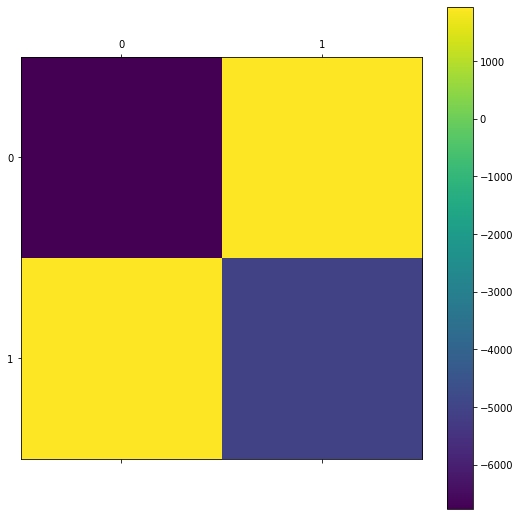

In [148]:
#function set
%run Function_Set.ipynb

# Obj
#QUBO = np.diag(np.abs(c))  

# add constraint (r1)^{T} Ax ≤ b^{T} r1 to (RMP):

Penalty = np.max(np.abs(obj))*10


QUBO_post, _= QUBO_Cons_ineq_normal(QUBO, cons_add_lhs_final, symbol, cons_add_rhs_final, penalty = Penalty)

print(QUBO_post)
show_graph(QUBO_post)



In [149]:
# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO_post)

OP = sampleset.to_pandas_dataframe()
OP_final = OP.to_numpy()[0]
result = OP_final[:length]
print("result x = :",result)

result x = : [1. 1.]


In [142]:
cons_add_lhs_final > 0

array([ True,  True])